### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [210]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 

from scipy.stats import zscore
from sklearn.cluster import KMeans

In [211]:
df = pd.read_csv("vehicle.csv")
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [213]:
df.shape

(846, 19)

In [214]:
df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [215]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [216]:
df[df.isna().any(axis=1)]
df[df.isnull().any(axis=1)].shape

(33, 19)

In [217]:
df = df.dropna(axis=0)
df.shape

(813, 19)

In [218]:
df[df.isna().any(axis=1)]
df[df.isnull().any(axis=1)].shape

(0, 19)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [219]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [220]:
df_groupby = df.groupby('class')

In [221]:
df_groupby.count()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus            205          205                   205           205   
car            413          413                   413           413   
van            195          195                   195           195   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus                     205                      205            205   
car                     413                      413            413   
van                     195                      195            195   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus              205                     205                        205   
car              413                     413                        413   
van              195                     195                        195   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus                205                205                        205   
car                413                413                        413   
van                195                195                        195   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                            205             205               205   
car                            413             413               413   
van                            195             195               195   

       skewness_about.2  hollows_ratio  
class                                   
bus                 205            205  
car                 413            413  
van                 195            195

### Check for any missing values in the data 

In [222]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [223]:
df.describe().transpose()

count        mean         std    min    25%  \
compactness                  813.0   93.656827    8.233751   73.0   87.0   
circularity                  813.0   44.803198    6.146659   33.0   40.0   
distance_circularity         813.0   82.043050   15.783070   40.0   70.0   
radius_ratio                 813.0  169.098401   33.615402  104.0  141.0   
pr.axis_aspect_ratio         813.0   61.774908    7.973000   47.0   57.0   
max.length_aspect_ratio      813.0    8.599016    4.677174    2.0    7.0   
scatter_ratio                813.0  168.563346   33.082186  112.0  146.0   
elongatedness                813.0   40.988930    7.803380   26.0   33.0   
pr.axis_rectangularity       813.0   20.558426    2.573184   17.0   19.0   
max.length_rectangularity    813.0  147.891759   14.504648  118.0  137.0   
scaled_variance              813.0  188.377614   31.165873  130.0  167.0   
scaled_variance.1            813.0  438.382534  175.270368  184.0  318.0   
scaled_radius_of_gyration    813.0  174.252153   32.332161  109.0  149.0   
scaled_radius_of_gyration.1  813.0   72.399754    7.475994   59.0   67.0   
skewness_about               813.0    6.351784    4.921476    0.0    2.0   
skewness_about.1             813.0   12.687577    8.926951    0.0    6.0   
skewness_about.2             813.0  188.979090    6.153681  176.0  184.0   
hollows_ratio                813.0  195.729397    7.398781  181.0  191.0   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          79.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            364.0  586.0  1018.0  
scaled_radius_of_gyration    173.0  198.0   268.0  
scaled_radius_of_gyration.1   71.0   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             189.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [224]:
# Create a separate dataframe consisting only of the features i.e independent attributes
df_features = df.drop(labels= "class" , axis = 1)
df_features.shape

(813, 18)

In [225]:
df_features_z = df_features.apply(zscore, axis = 0)  # convert all attributes to Z scale 
df_features_z_stats = df_features_z.describe().transpose()
df_features_z_stats

count          mean       std       min  \
compactness                  813.0 -2.425284e-16  1.000616 -2.510344   
circularity                  813.0 -4.642999e-16  1.000616 -1.921444   
distance_circularity         813.0 -2.351542e-16  1.000616 -2.665447   
radius_ratio                 813.0  3.665238e-16  1.000616 -1.937757   
pr.axis_aspect_ratio         813.0 -2.047016e-16  1.000616 -1.854258   
max.length_aspect_ratio      813.0 -1.349201e-16  1.000616 -1.411767   
scatter_ratio                813.0  3.714399e-16  1.000616 -1.710835   
elongatedness                813.0 -2.062038e-16  1.000616 -1.922008   
pr.axis_rectangularity       813.0 -2.651972e-16  1.000616 -1.383740   
max.length_rectangularity    813.0 -7.398756e-16  1.000616 -2.062109   
scaled_variance              813.0 -3.031605e-17  1.000616 -1.874279   
scaled_variance.1            813.0 -3.550529e-17  1.000616 -1.452266   
scaled_radius_of_gyration    813.0  3.348422e-16  1.000616 -2.019423   
scaled_radius_of_gyration.1  813.0  1.312159e-16  1.000616 -1.793474   
skewness_about               813.0 -1.693329e-17  1.000616 -1.291420   
skewness_about.1             813.0  9.845889e-17  1.000616 -1.422141   
skewness_about.2             813.0 -1.169490e-15  1.000616 -2.110457   
hollows_ratio                813.0  3.482249e-16  1.000616 -1.992013   

                                  25%       50%       75%       max  
compactness                 -0.808978 -0.079822  0.770861  3.079857  
circularity                 -0.781913 -0.130753  0.683198  2.311100  
distance_circularity        -0.763506 -0.192923  1.011639  1.899212  
radius_ratio                -0.836393 -0.062462  0.771002  4.878790  
pr.axis_aspect_ratio        -0.599253 -0.097251  0.404751  9.566288  
max.length_aspect_ratio     -0.342087 -0.128151  0.299721  9.926837  
scatter_ratio               -0.682459 -0.349749  0.890352  2.916857  
elongatedness               -1.024408  0.257876  0.642562  2.565989  
pr.axis_rectangularity      -0.606014 -0.217151  0.949438  3.282615  
max.length_rectangularity   -0.751377 -0.130505  0.766312  2.766901  
scaled_variance             -0.686352 -0.301079  0.918954  4.225885  
scaled_variance.1           -0.687262 -0.424649  0.842746  3.309026  
scaled_radius_of_gyration   -0.781504 -0.038752  0.734948  2.901308  
scaled_radius_of_gyration.1 -0.722724 -0.187348  0.348027  8.378655  
skewness_about              -0.884788 -0.071523  0.538425  3.181535  
skewness_about.1            -0.749606 -0.189159  0.707555  3.173519  
skewness_about.2            -0.809622  0.003400  0.653818  2.767675  
hollows_ratio               -0.639607  0.171837  0.712800  2.065206

C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning

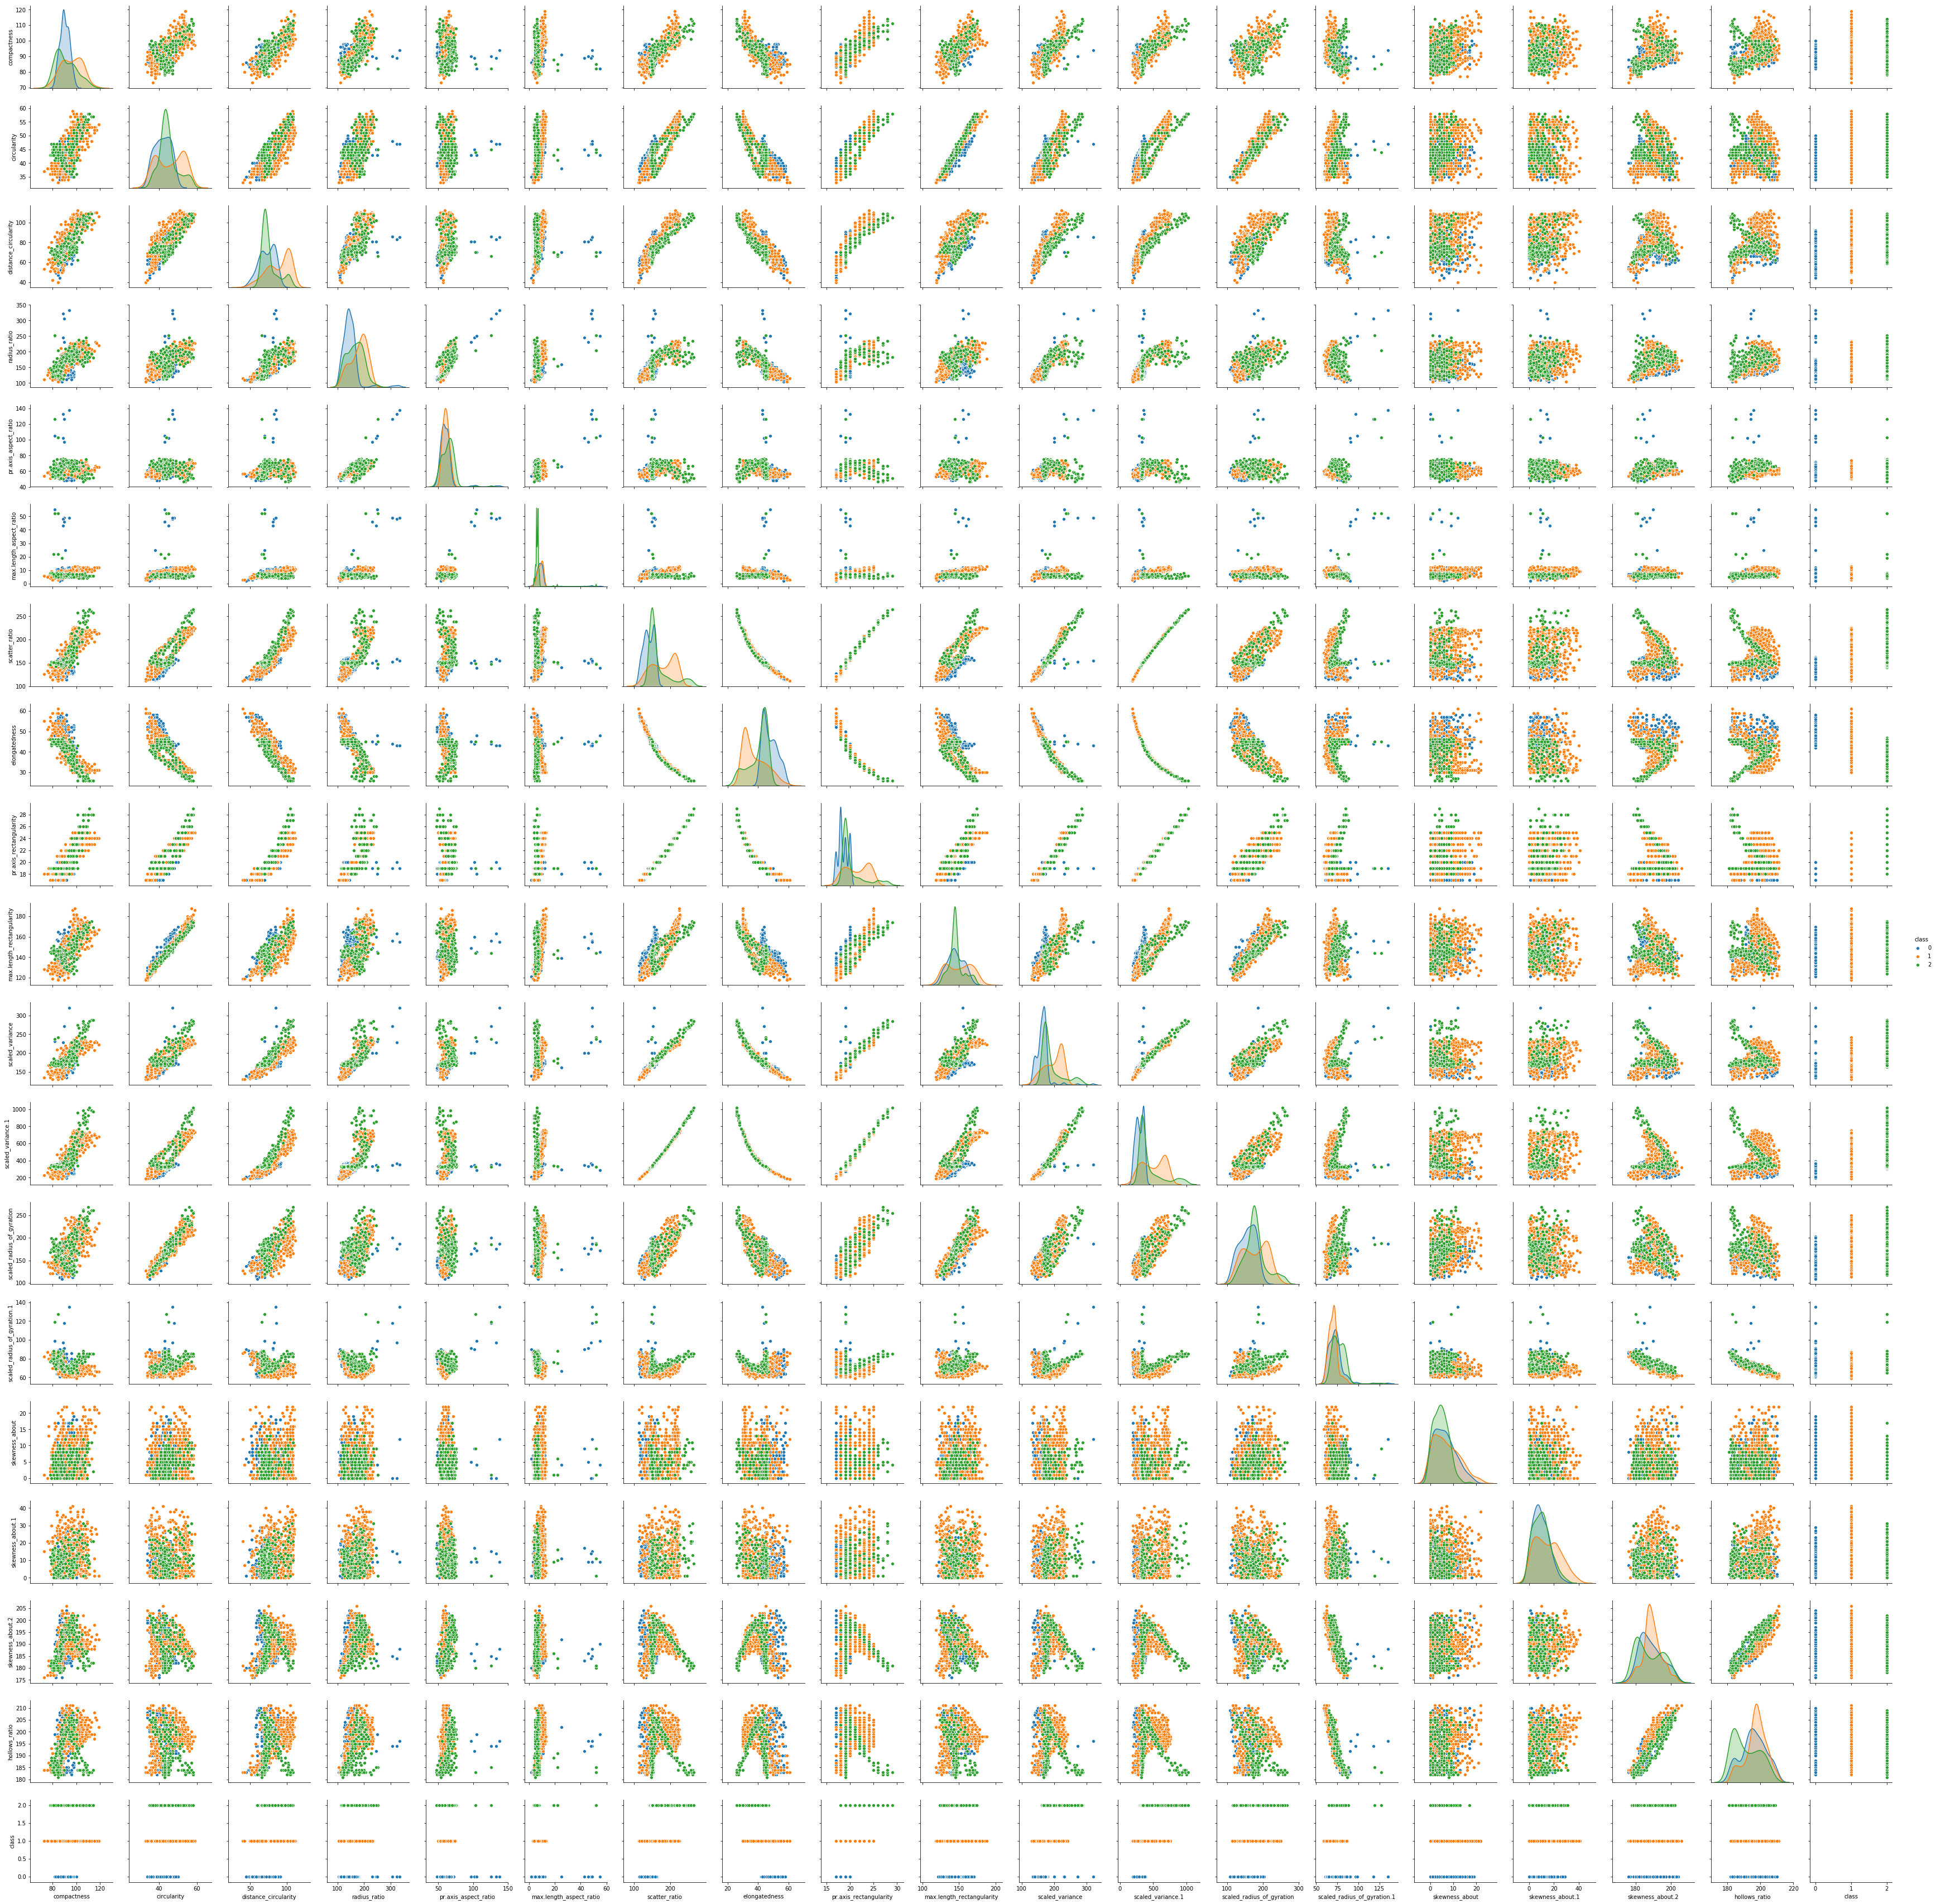

In [142]:
sns.pairplot(df, hue='class')

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [226]:
distortion = []

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [227]:
from sklearn.cluster import KMeans
from scipy.spatial import distance

# Let us check optimal number of clusters-
cluster_range = range(1,10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters) # n_init is for kmeans++ 
  clusters.fit(df_features_z)
  labels = clusters.labels_    
    # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  distortion.append(sum(np.min(distance.cdist(df_features_z, clusters.cluster_centers_, 'euclidean'), axis=1))/ df_features_z.shape[0])

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors})
clusters_df[:]

num_clusters  cluster_errors
0             1    14634.000000
1             2     8623.136976
2             3     7037.287609
3             4     5739.201327
4             5     5185.565948
5             6     4705.949959
6             7     4348.840290
7             8     4085.019240
8             9     3846.850000

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

### 6. Plotting Elbow/ Scree Plot

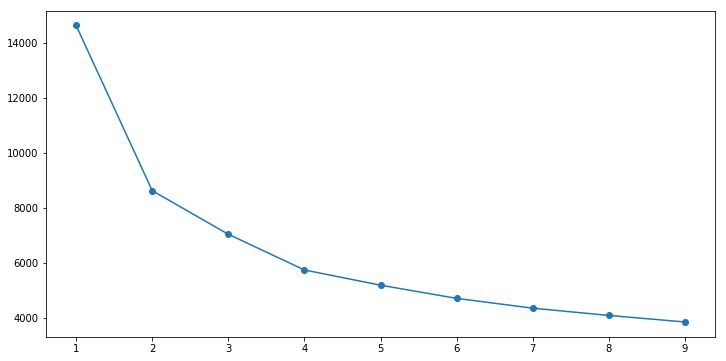

In [228]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [ ]:
# optimal value of K is 3 

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [229]:
# Number of clusters
kmeans = KMeans(n_clusters=3)

# Fitting the input data
kmeans = kmeans.fit(df_features_z)
# Getting the cluster labels
labels = kmeans.predict(df_features_z)

# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print(centroids) # From sci-kit learn

Centroid values
[[-0.22403254 -0.60827051 -0.31718356 -0.01731624  0.20645992 -0.12529856
  -0.46186223  0.32626501 -0.49194739 -0.57592328 -0.41419948 -0.46385031
  -0.63522265 -0.64777111 -0.06610151  0.02381036  0.87062354  0.73894602]
 [-0.89640009 -0.48207061 -0.85196226 -1.02675826 -0.46581606 -0.20340912
  -0.75933016  0.83667858 -0.72743741 -0.43998661 -0.76300107 -0.76675888
  -0.35618264  0.79769971 -0.08839932 -0.30124859 -1.02685623 -1.06510664]
 [ 1.13076532  1.17094237  1.19500584  1.01909505  0.21505188  0.34250798
   1.27180461 -1.19061224  1.27548416  1.09266768  1.22038121  1.28132727
   1.07954232 -0.02879497  0.16229031  0.26566456 -0.00535553  0.18380067]]


You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [230]:
centroids = cluster.cluster_centers_
centroids

array([[-0.2339617 , -0.57387481, -0.30776905, -0.03041322,  0.2050726 ,
        -0.11653151, -0.45904181,  0.32506329, -0.48798836, -0.53604446,
        -0.41380935, -0.46366305, -0.60155031, -0.61924057, -0.06177969,
         0.01066762,  0.81278556,  0.69897299],
       [ 1.13076532,  1.17094237,  1.19500584,  1.01909505,  0.21505188,
         0.34250798,  1.27180461, -1.19061224,  1.27548416,  1.09266768,
         1.22038121,  1.28132727,  1.07954232, -0.02879497,  0.16229031,
         0.26566456, -0.00535553,  0.18380067],
       [-0.91987072, -0.52009251, -0.89320752, -1.06435572, -0.50042171,
        -0.2190738 , -0.7791213 ,  0.86589322, -0.74535635, -0.484632  ,
        -0.78240328, -0.78341064, -0.38498232,  0.83878747, -0.09524349,
        -0.30171562, -1.05420601, -1.11069466]])

Hint: Use pd.Dataframe function 

In [231]:
centroid_df = pd.DataFrame(centroids, columns = list(df_features_z) )
centroid_df

compactness  circularity  distance_circularity  radius_ratio  \
0    -0.233962    -0.573875             -0.307769     -0.030413   
1     1.130765     1.170942              1.195006      1.019095   
2    -0.919871    -0.520093             -0.893208     -1.064356   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.205073                -0.116532      -0.459042   
1              0.215052                 0.342508       1.271805   
2             -0.500422                -0.219074      -0.779121   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.325063               -0.487988                  -0.536044   
1      -1.190612                1.275484                   1.092668   
2       0.865893               -0.745356                  -0.484632   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.413809          -0.463663                  -0.601550   
1         1.220381           1.281327                   1.079542   
2        -0.782403          -0.783411                  -0.384982   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.619241       -0.061780          0.010668   
1                    -0.028795        0.162290          0.265665   
2                     0.838787       -0.095243         -0.301716   

   skewness_about.2  hollows_ratio  
0          0.812786       0.698973  
1         -0.005356       0.183801  
2         -1.054206      -1.110695

### Use kmeans.labels_ function to print out the labels of the classes

In [232]:
prediction=cluster.predict(df_features_z)
df_features_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

In [234]:
df_features_z.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.163231     0.520408              0.060669      0.264970   
1    -0.322874    -0.619123              0.124067     -0.836393   
2     1.256966     0.845988              1.518823      1.187734   
3    -0.079822    -0.619123             -0.002729     -0.300595   
4    -1.052030    -0.130753             -0.763506      1.068668   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.283254                 0.299721      -0.198517   
1             -0.599253                 0.085785      -0.591720   
2              0.530251                 0.299721       1.162569   
3              0.153750                 0.085785      -0.742952   
4              5.173770                 9.285029      -0.591720   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.129648               -0.217151                   0.766312   
1       0.514333               -0.606014                  -0.337462   
2      -1.152637                0.949438                   0.697326   
3       0.642562               -0.606014                  -0.337462   
4       0.514333               -0.606014                  -0.268476   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.397397          -0.339014                   0.301676   
1        -0.590034          -0.618754                  -0.502972   
2         1.111591           1.122486                   1.415804   
3        -0.911095          -0.738643                  -1.462359   
4         1.689501          -0.647299                   0.425468   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.321192       -0.071523          0.371287   
1                    -0.053505        0.538425          0.147109   
2                     0.080339        1.555006         -0.413338   
3                    -1.258099       -0.071523         -0.301249   
4                     7.307905        0.538425         -0.189159   

   skewness_about.2  hollows_ratio  GROUP  
0         -0.321809       0.171837      0  
1          0.003400       0.442318      0  
2         -0.159204       0.036596      1  
3          1.629444       1.524243      0  
4         -1.460039      -1.721531      2

In [235]:
df_features_z.groupby("GROUP").count()

compactness  circularity  distance_circularity  radius_ratio  \
GROUP                                                                 
0              313          313                   313           313   
1              260          260                   260           260   
2              240          240                   240           240   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
GROUP                                                                 
0                       313                      313            313   
1                       260                      260            260   
2                       240                      240            240   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
GROUP                                                                     
0                313                     313                        313   
1                260                     260                        260   
2                240                     240                        240   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
GROUP                                                                  
0                  313                313                        313   
1                  260                260                        260   
2                  240                240                        240   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
GROUP                                                                  
0                              313             313               313   
1                              260             260               260   
2                              240             240               240   

       skewness_about.2  hollows_ratio  
GROUP                                   
0                   313            313  
1                   260            260  
2                   240            240

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C4B204A940>,
      dtype=object)

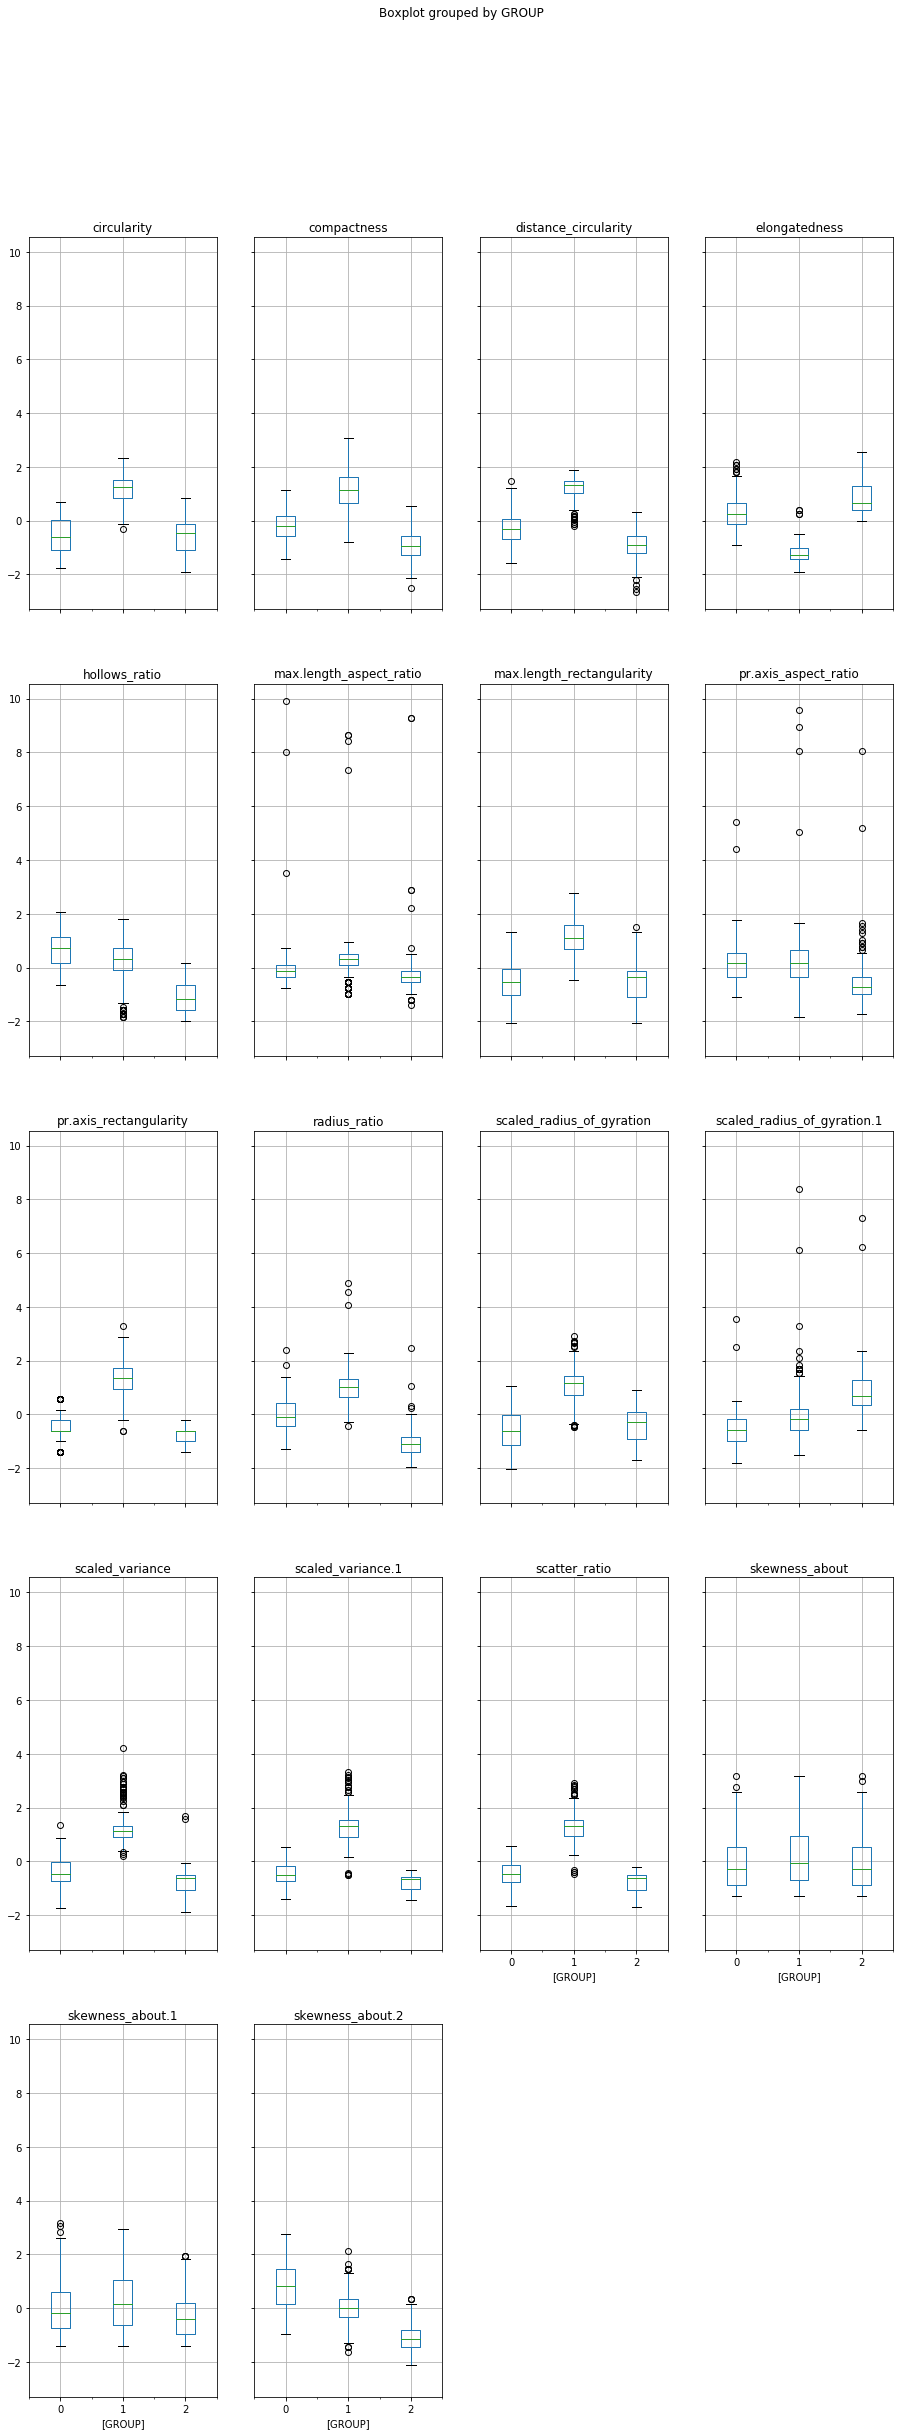

In [237]:
df_features_z.boxplot(by = 'GROUP', figsize=(15, 40))

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [445]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [446]:
print(a.shape)
print(b.shape)
print(c.shape)

(100, 2)
(50, 2)
(100, 2)


### 9. Combine all three arrays a,b,c into a dataframe

In [450]:
d = np.concatenate((a, c, b))

In [452]:
df1 = pd.DataFrame(d)
df1.head()
df1.shape

(250, 2)

### 10. Use scatter matrix to print all the 3 distributions

C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C4B6FD2D30>,
      dtype=object)

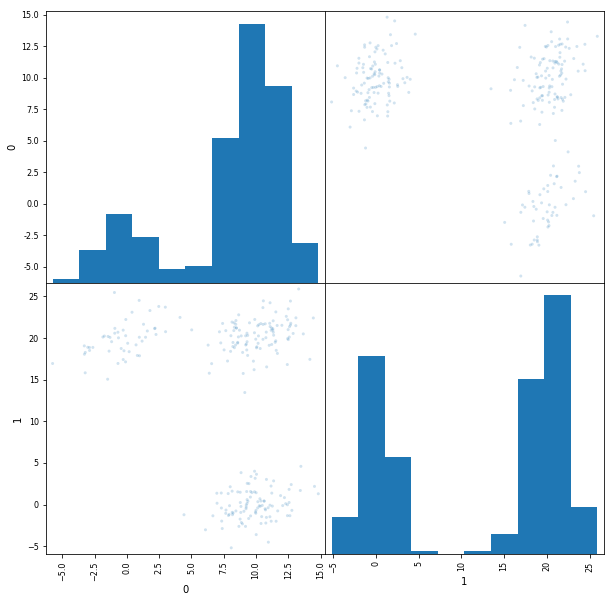

In [410]:
pd.scatter_matrix(df1, alpha=0.2, figsize=(10, 10))

In [411]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

### 11. Find out the linkage matrix

In [412]:
Z = linkage(df1, 'ward')
c, coph_dists = cophenet(Z , pdist(df1))
c

0.9567979226184801

Use ward as linkage metric and distance as Eucledian

### 12. Plot the dendrogram for the consolidated dataframe

In [413]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [414]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [415]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df1, 'ward')
c, coph_dists = cophenet(Z , pdist(df1))
c

0.9567979226184801

### 13. Recreate the dendrogram for last 12 merged clusters 

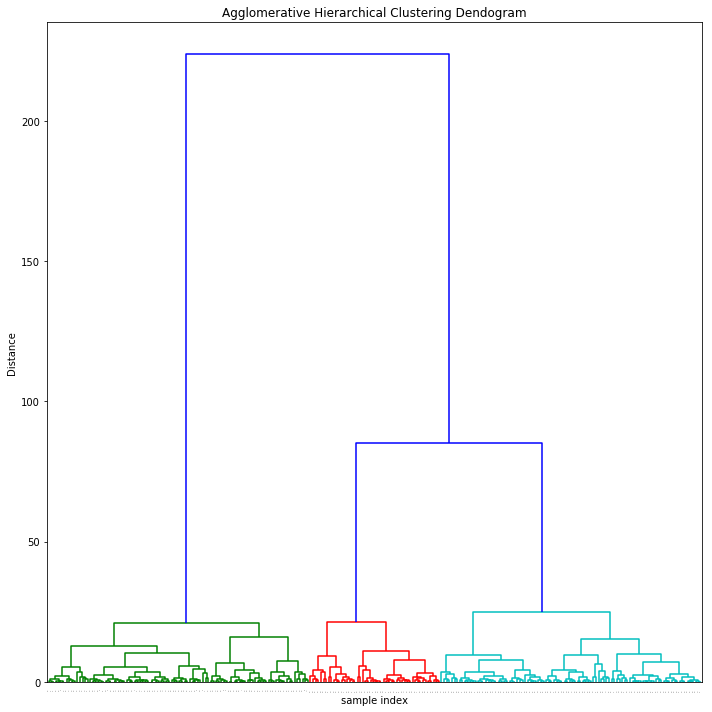

In [416]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=.2)
plt.tight_layout()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

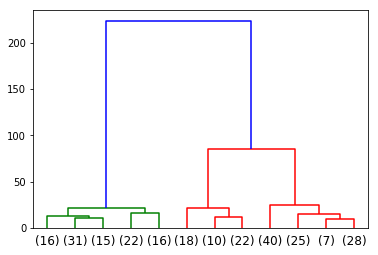

In [417]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
)
plt.show()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [418]:
# distance -- 30 to 80

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [419]:
from scipy.cluster.hierarchy import fcluster
t = 40
clusters = fcluster(Z, t, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

In [432]:
df1['clusters'] = clusters

In [433]:
df1.clusters.unique()

array([1, 2, 3], dtype=int64)

In [434]:
df1.head()

col1      col2  clusters
0   8.149316  1.618896         1
1   8.782840  0.252327         1
2   7.844590  1.326590         1
3   8.082379 -5.188282         1
4  10.253886 -0.133873         1

In [435]:
df1.columns = ['col1', 'col2', 'clusters']

In [436]:
df1.columns

Index(['col1', 'col2', 'clusters'], dtype='object')

In [438]:
df1.clusters.value_counts()

3    100
1    100
2     50
Name: clusters, dtype: int64

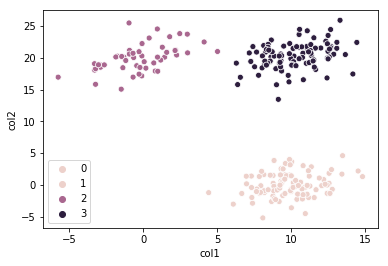

In [439]:
sns.scatterplot(df1.col1, df1.col2, hue = clusters)